### 순차 데이터
- 텍스트 데이터(ex: I am a boy) : 순서가 의미가 있다.
- 시계열 데이터(ex: 1일 10도, 2일 8도)

---
### 순환 신경망(RNN: Recurrent Neural Network)

<img src='../Data/순환신경망.png'>
I am a boy ( 말뭉치[Token]는 i,am,a,boy)<br>
이 문장들의 각각의 단어에 숫자(번호)가 매겨져 있어야된다.

> 입력층과 출력층(softmax) 중간에 숨어있는 셀 => Hidden Cell(히든셀)

# *** 면접 질문중요 ***
- IMDB(Internet Movie Data Base)
- IMDB 구성 : Train Data(25000개 중 긍정-12500개, 부정-12500개), Test Data(25000개중 긍정-12500개, 부정-12500개)
- NLP : Natural Language Processing(자연어 처리)
- 말뭉치 : 하나의 데이터셋을 말뭉치라고 표현
- 토큰 : 하나의 단어를 토큰이라고 표현
- 어휘사전 : 번호로 구분된 유일한 단어들의 집단
- 머신러닝이나 딥러닝에서 데이터가 숫자로 구성되어 있어야 함으로 이런 단어들을 고유한 번호로 할당하여 사용

In [1]:
from tensorflow.keras.datasets import imdb
# 500개 단어만 가져오기(25000개의 문장중에 500개 단어 가져오기)
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
# train의  첫번째 문장의 Token갯수
len(train_input[0])

218

In [4]:
len(train_input[1])

189

In [5]:
# 첫번째 댓글의 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


# __________숫자 설명부분 ___________
- 샘플의 시작부분 토큰은 1을 사용한다.
- 2는 선정한 단어갯수에 포함되지 않은 단어를 표현한다.(500개가 넘는 단어들)
- train_input 자체는 numpy 배열이나 댓글에 사용된 토큰수가 다르기 때문에 numpy 배열을 사용 못하고 Python list를 사용한다.

In [6]:
# train의 target 출력
print(train_target[:10])

[1 0 0 1 0 0 1 0 1 0]


In [7]:
# 훈련세트 준비
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [8]:
# 각 리뷰마다 문장 길이를 시각화
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


오른쪽 쏠림 그래프 모양이 있다.<br> 가장 좋은 그래프는 median값과 mean값이 비슷하면 좋다.
<img src='../Data/리뷰문장 시각화.png' width=200 height=100>

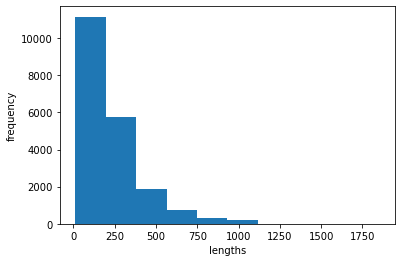

In [9]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')

plt.show()

---
### Sequence Padding
- 전체 자릿수를 100으로 가정했을 경우 한문장에 3개 토큰만 있을 경우 나머지 97개는 비워지고 이를 0으로 채우는 과정

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 위의 차트에서 100개 부분이 제일 많은 것 같아 100개 토큰만 사용
train_seq = pad_sequences(train_input, maxlen=100)
# 검증 데이터
val_seq = pad_sequences(val_input, maxlen=100)

In [11]:
# 크기 확인
print(train_seq.shape)

(20000, 100)


> 25000개의 훈련세트중 500개는 검증세트로 빠짐

In [12]:
# 원본의 첫번째 댓글의 마지막 10개만 출력
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [13]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


---
## 순환 신경망 모델 만들기

In [14]:
from tensorflow import keras

In [15]:
model = keras.Sequential()
# 8 : 쉘의 갯수 , 500 : 500개의 단어를 One Hot Encoding
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
# Dense : 1 (긍정 혹은 부정이기에 sigmoid는 하나만 가지고 할 수 있다.)
model.add(keras.layers.Dense(1, activation='sigmoid'))

2022-07-22 11:55:39.569809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# One hot encoding
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [17]:
# One hot encoding 확인하기 -> 정말 0과 1하나 뿐밖에 없는지
print(np.sum(train_oh[0][0]))


1.0


In [18]:
val_oh = keras.utils.to_categorical(val_seq)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


> simple_rnn Param# : 500 X 8 + (8 X 8) + 8 = 4072   
> dense Param# : 8 + 1 = 9

In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer = rmsprop, 
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-simplernn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights = True
)

history = model.fit(
    train_oh,
    train_target,
    epochs= 100, # rnn에서 최소 epoch의 값은 100입니다!
    batch_size = 64, # mini batch경사 하강법( 64 : 8 X 8 )
    validation_data = (val_oh, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]

)

Epoch 1/100
313/313 [==============================] - 17s 48ms/step - loss: 0.6990 - accuracy: 0.5064 - val_loss: 0.6942 - val_accuracy: 0.5224
Epoch 2/100
313/313 [==============================] - 15s 46ms/step - loss: 0.6925 - accuracy: 0.5218 - val_loss: 0.6900 - val_accuracy: 0.5340
Epoch 3/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6855 - accuracy: 0.5540 - val_loss: 0.6784 - val_accuracy: 0.5758
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6656 - accuracy: 0.6126 - val_loss: 0.6577 - val_accuracy: 0.6272
Epoch 5/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6467 - accuracy: 0.6538 - val_loss: 0.6430 - val_accuracy: 0.6576
Epoch 6/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6299 - accuracy: 0.6816 - val_loss: 0.6282 - val_accuracy: 0.6774
Epoch 7/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6154 - accuracy: 0.6981 - val_loss: 0.6196 - val_ac

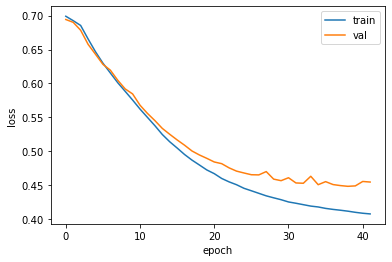

In [21]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

---
### LSTM(Long Short Term Memory) 신경망 모델 구성하기
- 순환신경망의 셀로 이전 타임스텝의 샘플을 기억하고 있음


In [22]:
model = keras.Sequential()
# Embedding -> One hot encoding
model.add(keras.layers.Embedding(500, 16, input_length=100))
# 8개의 Cell을 사용한다.
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer = rmsprop, 
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-lstm-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights = True
)

history = model.fit(
    train_seq,
    train_target,
    epochs= 100, # rnn에서 최소 epoch의 값은 100입니다!
    batch_size = 64, # mini batch경사 하강법( 64 : 8 X 8 )
    validation_data = (val_seq, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]

)

Epoch 1/100
313/313 [==============================] - 13s 33ms/step - loss: 0.6927 - accuracy: 0.5387 - val_loss: 0.6923 - val_accuracy: 0.5668
Epoch 2/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6913 - accuracy: 0.5997 - val_loss: 0.6906 - val_accuracy: 0.6046
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6884 - accuracy: 0.6291 - val_loss: 0.6867 - val_accuracy: 0.6372
Epoch 4/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6815 - accuracy: 0.6560 - val_loss: 0.6762 - val_accuracy: 0.6638
Epoch 5/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6579 - accuracy: 0.6769 - val_loss: 0.6315 - val_accuracy: 0.6900
Epoch 6/100
313/313 [==============================] - 10s 33ms/step - loss: 0.5970 - accuracy: 0.7228 - val_loss: 0.5798 - val_accuracy: 0.7370
Epoch 7/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5613 - accuracy: 0.7462 - val_loss: 0.5555 - val_ac

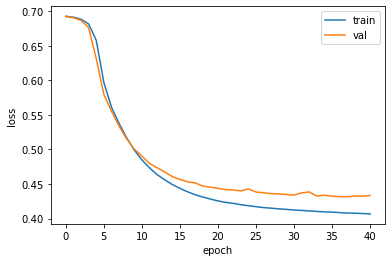

In [24]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

---
## 순환층에 드롭아웃 적용하기

In [25]:
model = keras.Sequential()
# Embedding -> One hot encoding
model.add(keras.layers.Embedding(500, 16, input_length=100))
# 8개의 Cell을 사용한다. 드롭아웃 30%
model.add(keras.layers.LSTM(8, dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer = rmsprop, 
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-dropout-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights = True
)

history = model.fit(
    train_seq,
    train_target,
    epochs= 100, # rnn에서 최소 epoch의 값은 100입니다!
    batch_size = 64, # mini batch경사 하강법( 64 : 8 X 8 )
    validation_data = (val_seq, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]

)

Epoch 1/100
313/313 [==============================] - 13s 34ms/step - loss: 0.6927 - accuracy: 0.5252 - val_loss: 0.6921 - val_accuracy: 0.5564
Epoch 2/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6905 - accuracy: 0.5872 - val_loss: 0.6890 - val_accuracy: 0.6118
Epoch 3/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6845 - accuracy: 0.6398 - val_loss: 0.6797 - val_accuracy: 0.6520
Epoch 4/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6618 - accuracy: 0.6732 - val_loss: 0.6328 - val_accuracy: 0.6862
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5958 - accuracy: 0.7203 - val_loss: 0.5805 - val_accuracy: 0.7334
Epoch 6/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5678 - accuracy: 0.7398 - val_loss: 0.5612 - val_accuracy: 0.7466
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.5500 - accuracy: 0.7499 - val_loss: 0.5446 - val_ac

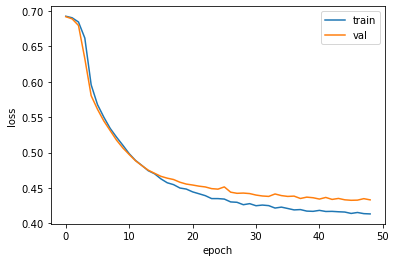

In [27]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

---
## 2개 층을 연결하기

In [29]:
model = keras.Sequential()
# Embedding -> One hot encoding
model.add(keras.layers.Embedding(500, 16, input_length=100))
# 8개의 Cell을 사용한다. 드롭아웃 30% 
# return_sequences를 써줘야 모든 타임스텝의 은닉상태를 출력할 수 있다. 그 다음 층으로 데이터를 변환해서 보내줄수 있다.
model.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model.add(keras.layers.LSTM(8, dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer = rmsprop, 
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-2rnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights = True
)

history = model.fit(
    train_seq,
    train_target,
    epochs= 100, # rnn에서 최소 epoch의 값은 100입니다!
    batch_size = 64, # mini batch경사 하강법( 64 : 8 X 8 )
    validation_data = (val_seq, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]

)

Epoch 1/100
313/313 [==============================] - 26s 67ms/step - loss: 0.6928 - accuracy: 0.5135 - val_loss: 0.6923 - val_accuracy: 0.5916
Epoch 2/100
313/313 [==============================] - 19s 62ms/step - loss: 0.6901 - accuracy: 0.5775 - val_loss: 0.6863 - val_accuracy: 0.6052
Epoch 3/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6603 - accuracy: 0.6291 - val_loss: 0.6192 - val_accuracy: 0.6936
Epoch 4/100
313/313 [==============================] - 19s 61ms/step - loss: 0.5916 - accuracy: 0.7125 - val_loss: 0.5726 - val_accuracy: 0.7242
Epoch 5/100
313/313 [==============================] - 20s 64ms/step - loss: 0.5547 - accuracy: 0.7344 - val_loss: 0.5386 - val_accuracy: 0.7412
Epoch 6/100
313/313 [==============================] - 20s 64ms/step - loss: 0.5272 - accuracy: 0.7525 - val_loss: 0.5120 - val_accuracy: 0.7600
Epoch 7/100
313/313 [==============================] - 20s 65ms/step - loss: 0.5067 - accuracy: 0.7650 - val_loss: 0.4993 - val_ac

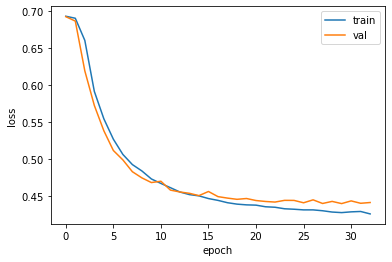

In [33]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

---
### GRU(Gated Recurrent Unit) 신경망
- LSTM의 간소화 버전
- 자동 드랍아웃, 최근 데이터로만 


In [34]:
model = keras.Sequential()

# Embedding = One Hot Encoding
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.GRU(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer = rmsprop, 
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-gru-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights = True
)

history = model.fit(
    train_seq,
    train_target,
    epochs= 100, # rnn에서 최소 epoch의 값은 100입니다!
    batch_size = 64, # mini batch경사 하강법( 64 : 8 X 8 )
    validation_data = (val_seq, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]

)

Epoch 1/100
313/313 [==============================] - 14s 38ms/step - loss: 0.6924 - accuracy: 0.5304 - val_loss: 0.6914 - val_accuracy: 0.5642
Epoch 2/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6905 - accuracy: 0.5687 - val_loss: 0.6893 - val_accuracy: 0.5892
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6876 - accuracy: 0.5887 - val_loss: 0.6860 - val_accuracy: 0.6034
Epoch 4/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6830 - accuracy: 0.6072 - val_loss: 0.6808 - val_accuracy: 0.6104
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6757 - accuracy: 0.6205 - val_loss: 0.6726 - val_accuracy: 0.6226
Epoch 6/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6642 - accuracy: 0.6382 - val_loss: 0.6601 - val_accuracy: 0.6316
Epoch 7/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6464 - accuracy: 0.6507 - val_loss: 0.6395 - val_ac